In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

##### Export the csv file

In [3]:
df = pd.read_csv("./marketing_campaigns_train.csv", index_col=0)

# Data information

In [4]:
print("Shape: ", df.shape)
df.head()

Shape:  (30517, 20)


,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
id,,,,,,,,,,,,,,,,,,,,
512491,married,32,unknown,doctoral,student,cellular,300,False,True,False,True,phone call,False,2,04-Feb,175,failure,1,272,False
495633,married,45,1,master,scientist,cellular,1339,False,True,False,True,phone call,False,1,08-Jul,322,unknown,0,-1,False
507946,married,54,2,master,technician,telephone,2832,False,True,False,True,phone call,False,1,19-Nov,67,unknown,0,-1,False
491165,married,30,unknown,master,engineer,unknown,530,True,True,False,True,phone call,False,1,04-Jun,45,unknown,0,-1,False
494627,married,40,unknown,doctoral,manager,unknown,-922,True,True,True,False,phone call,False,2,23-Jun,39,unknown,0,-1,False


We can see that we have unknown cells. We will change them to be NaN.

In [5]:
df.replace('unknown',np.nan,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30517 entries, 512491 to 516748
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           30517 non-null  object
 1   age              30517 non-null  int64 
 2   n_child          10697 non-null  object
 3   education        29273 non-null  object
 4   profession       30324 non-null  object
 5   device           21646 non-null  object
 6   account_balance  30517 non-null  int64 
 7   loan             30517 non-null  bool  
 8   mortgage         30517 non-null  bool  
 9   credit           30517 non-null  bool  
 10  positive         30517 non-null  bool  
 11  campaign_type    30517 non-null  object
 12  consent          30517 non-null  bool  
 13  n_contact        30517 non-null  int64 
 14  l_date           30517 non-null  object
 15  l_call_duration  30517 non-null  int64 
 16  p_outcome        5574 non-null   object
 17  n_p_contact      30517 no

##### Split the data and target

In [7]:
target =pd.DataFrame(df['subscribed']) # target value is subscribed
data = df.drop('subscribed', axis=1)

In [8]:
num_col = data.describe().columns # to get the numeric column

##### Split the data to numeric and nominal

In [9]:
num_data = data[num_col] # numeric data
nom_data = data.drop(num_col, axis=1) # nominal data

# Data Statistics

## Numerical data

##### Statistic information:

In [10]:
num_data.describe()


,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
count,30517.000000,30517.000000,30517.000000,30517.000000,30517.00000,30517.000000
mean,40.873546,1228.707966,2.769604,233.294262,0.58397,40.320706
std,10.591058,2738.410757,3.085730,232.690931,2.48213,100.489272
min,18.000000,-7207.000000,1.000000,2.000000,0.00000,-1.000000
25%,33.000000,74.000000,1.000000,95.000000,0.00000,-1.000000
50%,39.000000,411.000000,2.000000,164.000000,0.00000,-1.000000
75%,48.000000,1278.000000,3.000000,286.000000,0.00000,-1.000000
max,95.000000,91924.000000,63.000000,4428.000000,275.00000,871.000000


##### Visualization of the numeric data

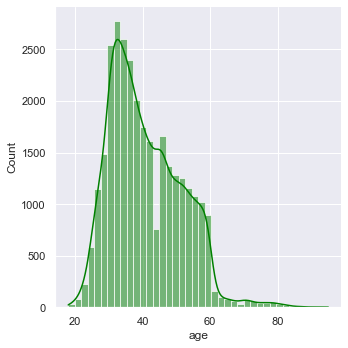

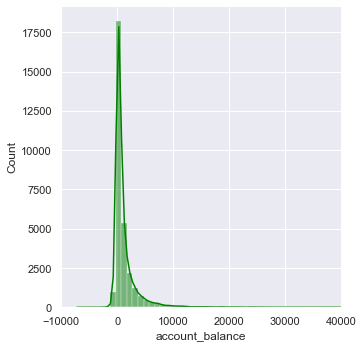

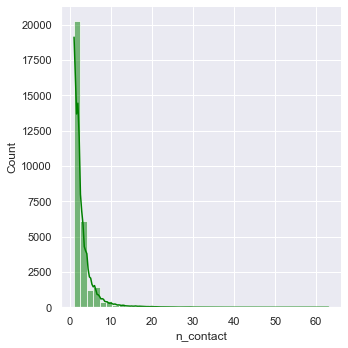

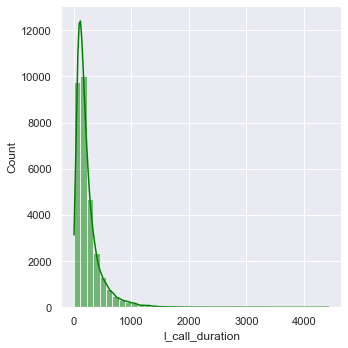

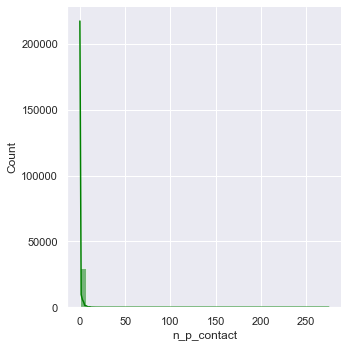

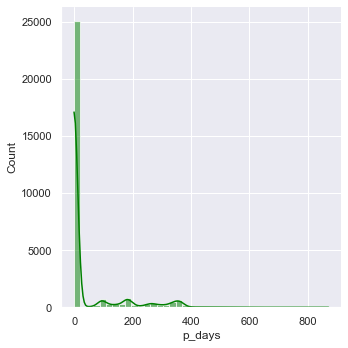

In [11]:
for col in num_col:
    if col == "account_balance":
        sns.displot(num_data[col], bins=100, kde=True, color='green').set(xlim=[-10000,40000])
    else:
        sns.displot(num_data[col], bins=40, kde=True, color='green')
       

##### Skewness

In [12]:
num_data['age'].skew(axis = 0, skipna = True)

0.6962760241958142

In [13]:
num_data['account_balance'].skew(axis = 0, skipna = True)

8.348069094854177

In [14]:
num_data['n_contact'].skew(axis = 0, skipna = True)

4.791966663755302

In [15]:
num_data['l_call_duration'].skew(axis = 0, skipna = True)

3.3062004571753185

In [16]:
num_data['n_p_contact'].skew(axis = 0, skipna = True)

48.06345685311376

In [17]:
num_data['p_days'].skew(axis = 0, skipna = True)

2.6168171339327766

##### Exploring the behavior of the numeric attributes according to the target values 

Mean age of subscribed = Fale: 40.77971626477016
Mean age of subscribed = True: 41.59318181818182
Median age of subscribed = Fale: 39.0
Median age of subscribed = True: 38.0


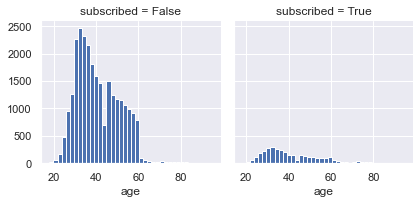

In [18]:
g = sns.FacetGrid(df, col='subscribed')
g.map(plt.hist, 'age', bins=40)
print("Mean age of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'age'].mean()))
print("Mean age of subscribed = True: "+ str(df.loc[df['subscribed']==True,'age'].mean()))
print("Median age of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'age'].median()))
print("Median age of subscribed = True: "+ str(df.loc[df['subscribed']==True,'age'].median()))

Mean l_call_duration of subscribed = False: 200.7432307293403
Mean l_call_duration of subscribed = True: 482.94772727272726
Median l_call_duration of subscribed = False: 150.0
Median l_call_duration of subscribed = True: 377.0


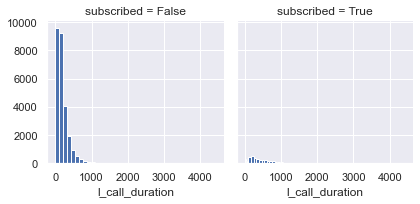

In [19]:
g.map(plt.hist, 'l_call_duration', bins=40);
print("Mean l_call_duration of subscribed = False: "+ str(df.loc[df['subscribed']==False,'l_call_duration'].mean()))
print("Mean l_call_duration of subscribed = True: "+ str(df.loc[df['subscribed']==True,'l_call_duration'].mean()))
print("Median l_call_duration of subscribed = False: "+ str(df.loc[df['subscribed']==False,'l_call_duration'].median()))
print("Median l_call_duration of subscribed = True: "+ str(df.loc[df['subscribed']==True,'l_call_duration'].median()))

Mean account_balance of subscribed = Fale: 1176.2046894099344
Mean account_balance of subscribed = True: 1631.3872159090909
Median account_balance of subscribed = Fale: 382.0
Median account_balance of subscribed = True: 666.0


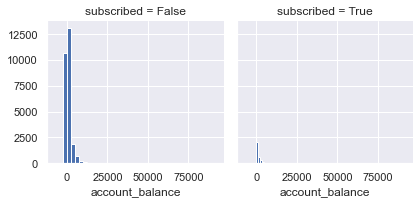

In [20]:
g.map(plt.hist, 'account_balance', bins=40);
print("Mean account_balance of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'account_balance'].mean()))
print("Mean account_balance of subscribed = True: "+ str(df.loc[df['subscribed']==True,'account_balance'].mean()))
print("Median account_balance of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'account_balance'].median()))
print("Median account_balance of subscribed = True: "+ str(df.loc[df['subscribed']==True,'account_balance'].median()))

Mean n_contact of subscribed = Fale: 2.849612919954069
Mean n_contact of subscribed = True: 2.155965909090909
Median n_contact of subscribed = Fale: 2.0
Median n_contact of subscribed = True: 2.0


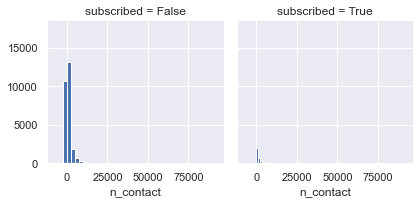

In [21]:
g.map(plt.hist, 'n_contact', bins=40);
print("Mean n_contact of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'n_contact'].mean()))
print("Mean n_contact of subscribed = True: "+ str(df.loc[df['subscribed']==True,'n_contact'].mean()))
print("Median n_contact of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'n_contact'].median()))
print("Median n_contact of subscribed = True: "+ str(df.loc[df['subscribed']==True,'n_contact'].median()))

Mean n_p_contact of subscribed = Fale: 0.5022409897396007
Mean n_p_contact of subscribed = True: 1.2107954545454545
Median n_p_contact of subscribed = Fale: 0.0
Median n_p_contact of subscribed = True: 0.0


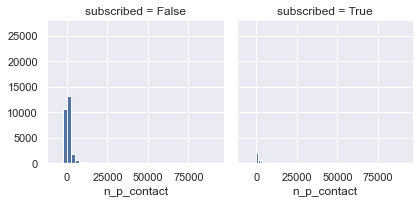

In [22]:
g.map(plt.hist, 'n_p_contact', bins=40);
print("Mean n_p_contact of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'n_p_contact'].mean()))
print("Mean n_p_contact of subscribed = True: "+ str(df.loc[df['subscribed']==True,'n_p_contact'].mean()))
print("Median n_p_contact of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'n_p_contact'].median()))
print("Median n_p_contact of subscribed = True: "+ str(df.loc[df['subscribed']==True,'n_p_contact'].median()))

Mean p_days of subscribed = Fale: 36.750824165648034
Mean p_days of subscribed = True: 67.7002840909091
Median p_days of subscribed = Fale: -1.0
Median p_days of subscribed = True: -1.0


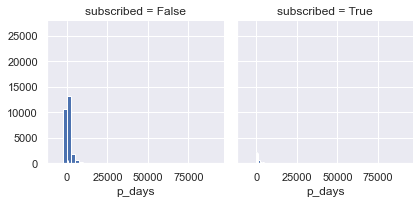

In [23]:
g.map(plt.hist, 'p_days', bins=40);
print("Mean p_days of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'p_days'].mean()))
print("Mean p_days of subscribed = True: "+ str(df.loc[df['subscribed']==True,'p_days'].mean()))
print("Median p_days of subscribed = Fale: "+str(df.loc[df['subscribed']==False,'p_days'].median()))
print("Median p_days of subscribed = True: "+ str(df.loc[df['subscribed']==True,'p_days'].median()))

## Nominal data

In [24]:
describe_df = nom_data.describe()
# adding 'Precent of top value' row
describe_df.loc['Precent of top value']=describe_df.apply(lambda x: np.round((x.loc['freq']/30517)*100,decimals=3))
describe_df

,status,n_child,education,profession,device,loan,mortgage,credit,positive,campaign_type,consent,l_date,p_outcome
count,30517,10697,29273,30324,21646,30517,30517,30517,30517,30517,30517,30517,5574
unique,3,4,3,11,2,2,2,2,2,1,2,308,3
top,married,1,master,engineer,cellular,False,True,False,True,phone call,False,15-May,failure
freq,18414,3058,15622,6538,19718,25632,17055,29987,28059,30517,26997,782,3330
Precent of top value,60.34,10.021,51.191,21.424,64.613,83.993,55.887,98.263,91.945,100.0,88.465,2.563,10.912


##### Visualization of the nominal data

In [25]:
dist_col=['loan','mortgage','credit','positive','consent']
for col in dist_col:
    nom_data[col]=nom_data[col].replace({True: "True",False: "False"})

In [26]:
df['month_l_date'] = df['l_date'].str[3:]
df['month_l_date'].unique()

array(['Feb', 'Jul', 'Nov', 'Jun', 'May', 'Aug', 'Apr', 'Sep', 'Mar',
       'Jan', 'Oct', 'Dec'], dtype=object)

* As we can see the months are ok

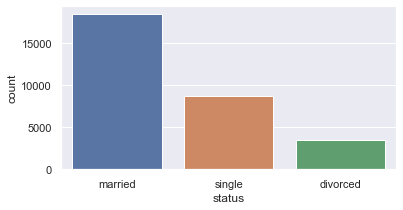

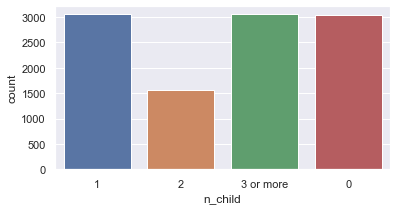

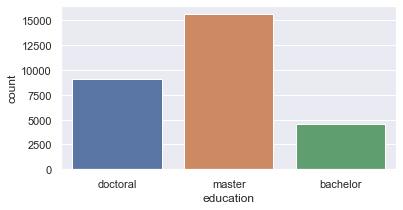

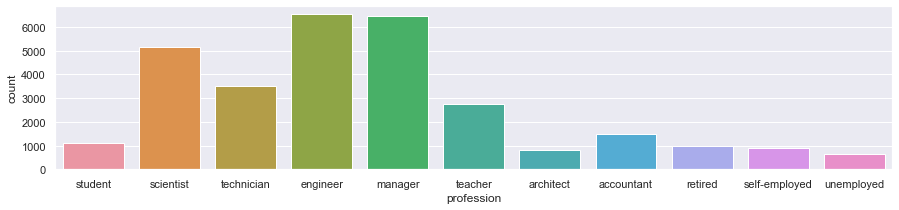

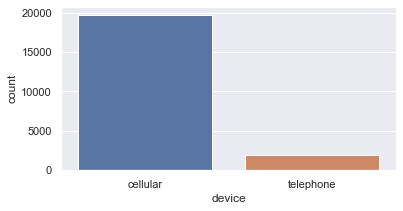

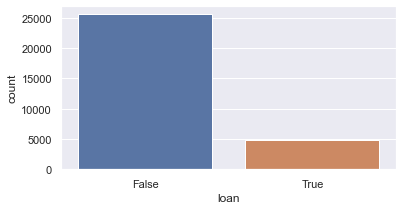

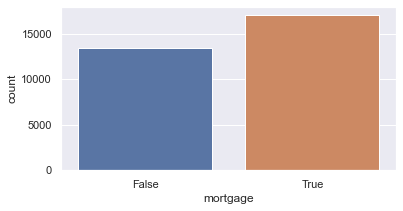

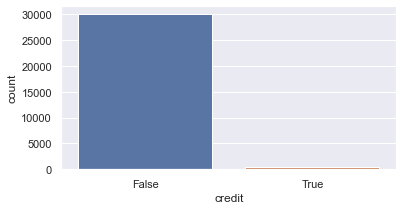

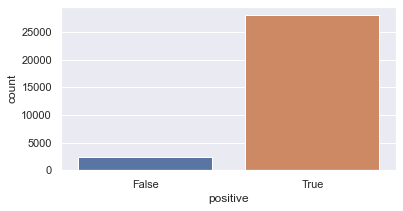

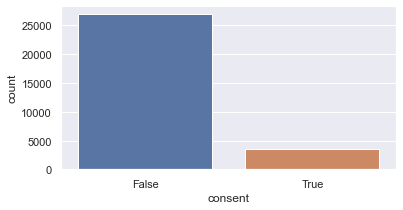

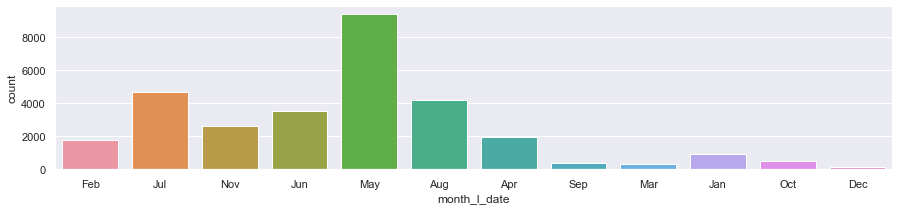

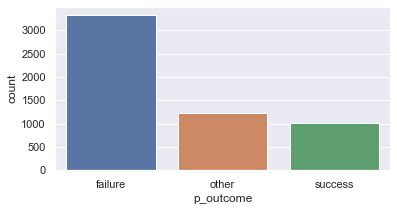

In [27]:
dist_col = ['status','n_child', 'education', 'profession', 'device','loan','mortgage','credit','positive','consent','month_l_date','p_outcome']
for col in dist_col:
    if col == "profession":
        plt.figure(figsize=(15,3))
        sns.countplot(x='profession',data=df)
    elif col == 'month_l_date':
        plt.figure(figsize=(15,3))
        sns.countplot(x='month_l_date',data=df)
    else:
        plt.figure(figsize=(6,3))
        sns.countplot(x=col,data=df)
        

##### Scatter Plot

* Scatter plot on l_call_duration. Notice that as the call between 1000-2000 sec, more people subscribed.

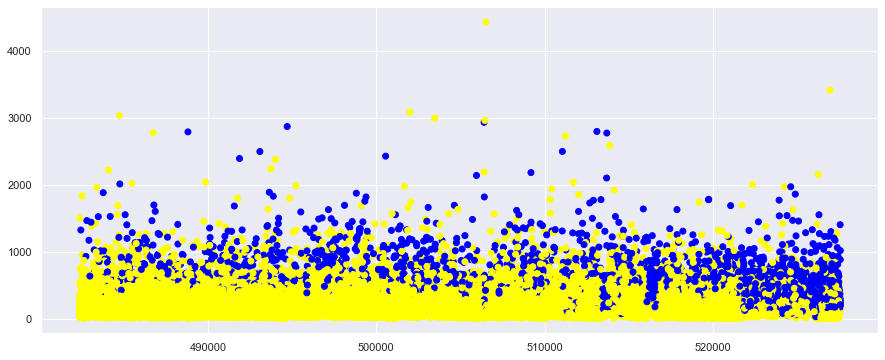

In [28]:
colordict = {False: 'yellow', True: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index,df['l_call_duration'], c = df['subscribed'].map(colordict))

## Target

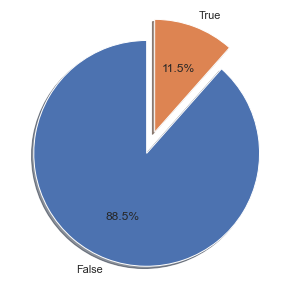

In [29]:
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes
fig1, ax1 = plt.subplots()
ax1.pie(target['subscribed'].value_counts(), labels=target['subscribed'].unique(), autopct='%1.1f%%', shadow=True, startangle=90,explode=(0,0.2))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## BoxPlot 

#### Age vs Status

<AxesSubplot:xlabel='status', ylabel='age'>

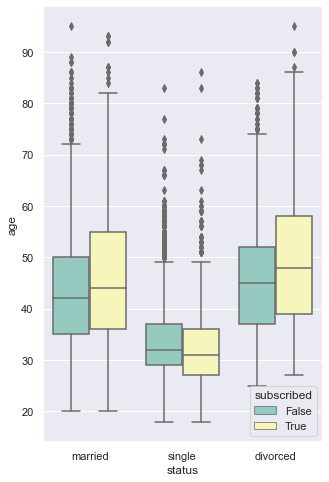

In [30]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="age", x="status", hue= "subscribed", data=df, palette="Set3")

#### Age vs education

<AxesSubplot:xlabel='education', ylabel='age'>

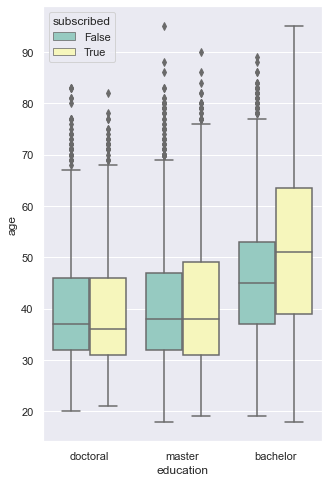

In [31]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="age", x="education", hue= "subscribed", data=df, palette="Set3")

#### l_call_duration vs education

<AxesSubplot:xlabel='education', ylabel='l_call_duration'>

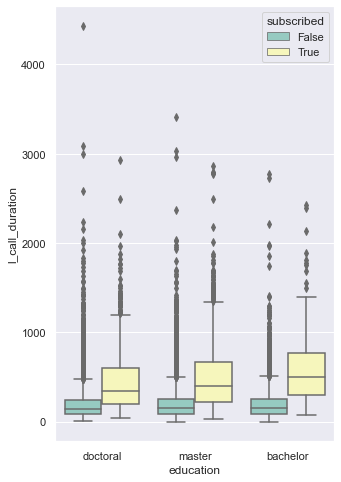

In [32]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="l_call_duration", x="education", hue= "subscribed", data=df, palette="Set3")


#### l_call_duration vs loan

<AxesSubplot:xlabel='loan', ylabel='l_call_duration'>

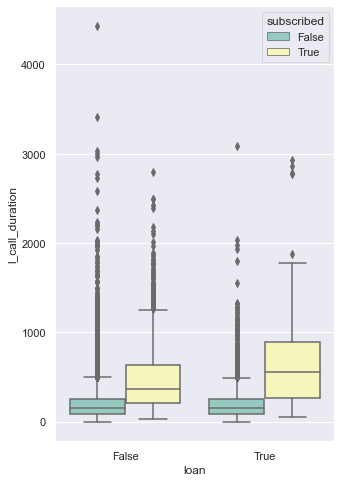

In [33]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="l_call_duration", x="loan", hue= "subscribed", data=df, palette="Set3")

# Correlation of the data

In [34]:
# using cat.codes to change the nominal codes
df['status_cat'] = df['status'].astype('category').cat.codes
df['n_child_cat'] = df['n_child'].astype('category').cat.codes
df['education_cat'] = df['education'].astype('category').cat.codes
df['profession_cat'] = df['profession'].astype('category').cat.codes
df['device_cat'] = df['device'].astype('category').cat.codes
df['month_l_date_cat'] = df['l_date'].astype('category').cat.codes
df['p_outcome_cat'] = df['p_outcome'].astype('category').cat.codes
# In the following analayz we saw that 100% of the campaign_type is phone call so we dont include it in the correlation

In [35]:
df.corr()

,age,account_balance,loan,mortgage,credit,positive,consent,n_contact,l_call_duration,n_p_contact,p_days,subscribed,status_cat,n_child_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
age,1.000000,0.092772,-0.015191,-0.180339,-0.011368,0.032246,0.024535,0.002580,-0.004914,0.002419,-0.019118,0.024535,-0.401011,0.001139,-0.162883,-0.275222,0.090495,-0.014513,0.014846
account_balance,0.092772,1.000000,-0.083275,-0.066680,-0.065549,0.164656,0.053098,-0.017236,0.024136,0.015960,0.005281,0.053098,0.002716,-0.002168,-0.043557,-0.040615,0.047539,0.006829,0.033524
loan,-0.015191,-0.083275,1.000000,0.039223,0.065782,-0.127920,-0.070909,0.008471,-0.010997,-0.011798,-0.021501,-0.070909,-0.052365,-0.000292,0.070242,0.028375,0.004617,0.011181,-0.048102
mortgage,-0.180339,-0.066680,0.039223,1.000000,-0.005658,-0.109203,-0.140947,-0.019754,0.003474,0.035826,0.120401,-0.140947,-0.023016,0.013159,0.072314,0.042307,-0.210578,-0.020977,-0.006021
credit,-0.011368,-0.065549,0.065782,-0.005658,1.000000,-0.203070,-0.020521,0.019925,-0.006815,-0.015715,-0.027171,-0.020521,-0.013228,0.002855,0.007143,-0.012207,-0.024835,0.013072,-0.037577
positive,0.032246,0.164656,-0.127920,-0.109203,-0.203070,1.000000,0.060508,-0.013475,0.014284,0.017435,0.014001,0.060508,0.034808,-0.005392,-0.040239,-0.016414,0.075970,-0.024436,0.046567
consent,0.024535,0.053098,-0.070909,-0.140947,-0.020521,0.060508,1.000000,-0.071808,0.387417,0.091189,0.098385,1.000000,0.046076,-0.005940,-0.005521,0.012857,0.131735,-0.027437,0.256450
n_contact,0.002580,-0.017236,0.008471,-0.019754,0.019925,-0.013475,-0.071808,1.000000,-0.083522,-0.035717,-0.091788,-0.071808,-0.007640,0.003438,-0.022184,-0.019024,0.020275,0.167060,-0.098269
l_call_duration,-0.004914,0.024136,-0.010997,0.003474,-0.006815,0.014284,0.387417,-0.083522,1.000000,0.001427,-0.005878,0.387417,0.009555,0.002256,0.001854,-0.014698,-0.000008,-0.032194,0.022190
n_p_contact,0.002419,0.015960,-0.011798,0.035826,-0.015715,0.017435,0.091189,-0.035717,0.001427,1.000000,0.429496,0.091189,0.014770,-0.002947,0.004774,0.009999,0.130677,-0.051194,0.455676


<AxesSubplot:>

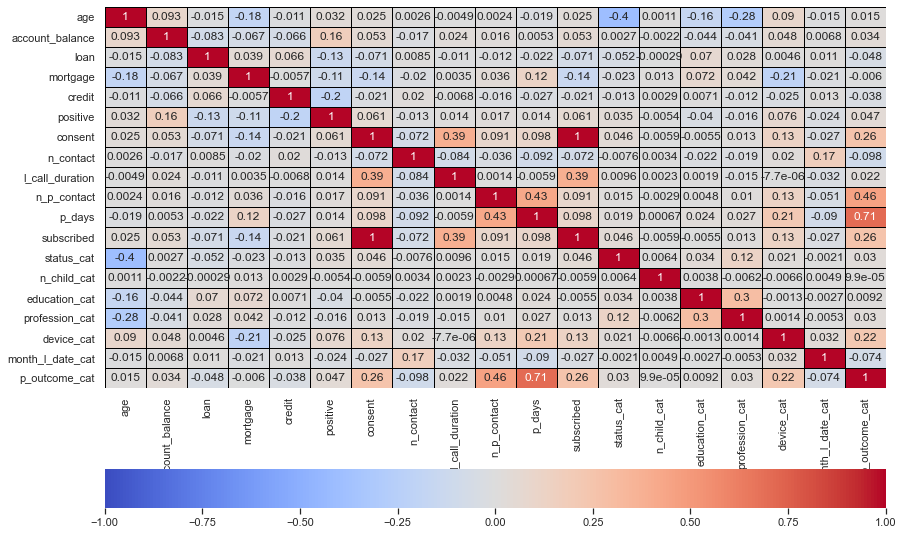

In [36]:
# heat map
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

# Data Cleaning

### Pre- Processing

In [37]:
df[df.isnull().sum(axis=1)>4] # checking which lines have more then 4 miss values

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,...,p_days,subscribed,month_l_date,status_cat,n_child_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
id,,,,,,,,,,,,,,,,,,,,,
482368,single,33,NaN,NaN,NaN,NaN,11,False,False,False,...,-1,False,May,2,-1,-1,-1,-1,44,-1
491961,married,46,NaN,NaN,NaN,NaN,2140,False,False,False,...,-1,False,Jun,1,-1,-1,-1,-1,53,-1
485212,single,25,NaN,NaN,NaN,NaN,306,False,True,False,...,-1,False,May,2,-1,-1,-1,-1,139,-1
483240,single,37,NaN,NaN,NaN,NaN,383,False,True,False,...,-1,False,May,2,-1,-1,-1,-1,65,-1
491366,married,59,NaN,NaN,NaN,NaN,3556,False,False,False,...,-1,False,Jun,1,-1,-1,-1,-1,42,-1
494511,married,56,NaN,NaN,NaN,NaN,335,False,False,False,...,-1,False,Jun,1,-1,-1,-1,-1,199,-1
491374,divorced,51,NaN,NaN,NaN,NaN,1494,False,False,False,...,-1,False,Jun,0,-1,-1,-1,-1,42,-1
506445,married,57,NaN,NaN,NaN,NaN,17351,False,False,False,...,-1,True,Oct,1,-1,-1,-1,-1,230,-1
491752,divorced,56,NaN,NaN,NaN,NaN,1947,False,False,False,...,-1,False,Jun,0,-1,-1,-1,-1,53,-1


In [38]:
df[df.isnull().sum(axis=1)>5] # checking which lines have more then 5 miss values

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,...,p_days,subscribed,month_l_date,status_cat,n_child_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
id,,,,,,,,,,,,,,,,,,,,,


We can see that the maximum missing values in a line is 4.

## N_child

In [39]:
df[df['n_child'].isnull()] # check how many rows has n_child null values

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,...,p_days,subscribed,month_l_date,status_cat,n_child_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
id,,,,,,,,,,,,,,,,,,,,,
512491,married,32,NaN,doctoral,student,cellular,300,False,True,False,...,272,False,Feb,1,-1,1,7,0,29,0
491165,married,30,NaN,master,engineer,NaN,530,True,True,False,...,-1,False,Jun,1,-1,2,2,-1,31,-1
494627,married,40,NaN,doctoral,manager,NaN,-922,True,True,True,...,-1,False,Jun,1,-1,1,3,-1,227,-1
489162,married,39,NaN,NaN,engineer,NaN,584,True,True,False,...,-1,False,May,1,-1,-1,2,-1,280,-1
499714,married,50,NaN,master,technician,cellular,501,False,False,False,...,-1,False,Jul,1,-1,2,9,0,278,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503479,married,60,NaN,doctoral,manager,cellular,693,False,False,False,...,-1,False,Aug,1,-1,1,3,0,134,-1
510801,single,43,NaN,NaN,technician,cellular,437,False,False,False,...,-1,False,Jan,2,-1,-1,9,0,286,-1
495601,single,34,NaN,master,scientist,cellular,8,True,False,True,...,-1,False,Jul,2,-1,2,5,0,72,-1


In [40]:
df_new = df[df['n_child'].notna()]

<AxesSubplot:>

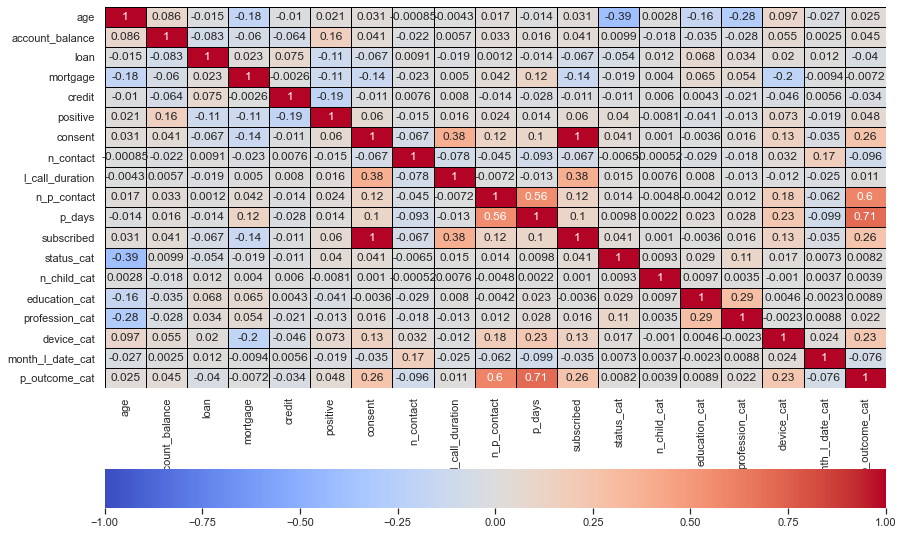

In [41]:
# heat map
plt.figure(figsize=(14,10))
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

In [42]:
df.drop('n_child', inplace=True, axis=1)
df.drop('n_child_cat', inplace=True, axis=1)

## Education

In [43]:
df[df['education'].isnull()] # check how many rows has education null values

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,n_p_contact,p_days,subscribed,month_l_date,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
id,,,,,,,,,,,,,,,,,,,,,
489162,married,39,NaN,engineer,NaN,584,True,True,False,True,...,0,-1,False,May,1,-1,2,-1,280,-1
503881,married,48,NaN,NaN,cellular,13,False,False,False,True,...,0,-1,False,Aug,1,-1,-1,0,188,-1
526626,married,93,NaN,accountant,cellular,708,False,False,False,True,...,7,177,True,Jul,1,-1,0,0,217,2
494498,single,41,NaN,engineer,NaN,4226,False,False,False,True,...,0,-1,False,Jun,2,-1,2,-1,199,-1
517019,married,46,NaN,engineer,cellular,8405,False,True,False,True,...,0,-1,True,May,1,-1,2,0,44,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508682,married,55,NaN,engineer,cellular,2432,False,True,False,True,...,2,104,False,Nov,1,-1,2,0,202,1
516084,divorced,45,NaN,NaN,cellular,10,False,False,False,True,...,0,-1,True,Apr,0,-1,-1,0,205,-1
493070,single,54,NaN,scientist,NaN,1536,False,False,False,True,...,0,-1,False,Jun,2,-1,5,-1,159,-1


##### Filling missing values using similarity between objects

In [44]:
education_miss = df[df['education'].isnull()].drop(['status','education','profession','device','month_l_date','l_date','p_outcome','campaign_type'], axis = 1)
education_exist = df[df['education'].notnull()].drop(['status','education','profession','device','month_l_date','l_date','p_outcome','campaign_type'], axis = 1)

In [45]:
ary = scipy.spatial.distance.cdist(education_miss, education_exist, metric='euclidean')

In [46]:
df.groupby(['education','education_cat']).size()

education  education_cat
bachelor   0                 4590
doctoral   1                 9061
master     2                15622
dtype: int64

In [47]:
df['education_Pre_Proc'] = df['education']
for i,j in enumerate(education_miss.index):
    value= int(df.loc[education_exist[ary[i]==ary[i].min()].index]['education_cat'].mean())
    if value == 0:
        df.loc[j,'education_Pre_Proc'] = 'bachelor'
    elif value == 1:
        df.loc[j,'education_Pre_Proc'] = 'doctoral'
    else:
        df.loc[j,'education_Pre_Proc'] = 'master'

In [48]:
df['education_Pre_Proc']

id 
512491    doctoral
495633      master
507946      master
491165      master
494627    doctoral
            ...   
503479    doctoral
510801    bachelor
495601      master
501424    doctoral
516748    doctoral
Name: education_Pre_Proc, Length: 30517, dtype: object

<AxesSubplot:xlabel='education_Pre_Proc', ylabel='count'>

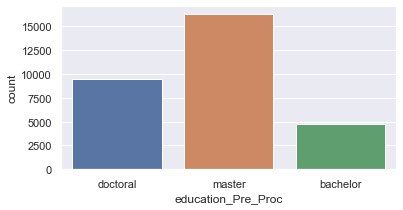

In [49]:
plt.figure(figsize=(6,3))
sns.countplot(x='education_Pre_Proc',data=df)

## Profession

In [50]:
df[df['profession'].isnull()] # check how many rows has profession null values

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,p_days,subscribed,month_l_date,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
503881,married,48,NaN,NaN,cellular,13,False,False,False,True,...,-1,False,Aug,1,-1,-1,0,188,-1,doctoral
504863,married,54,bachelor,NaN,cellular,893,False,False,False,True,...,-1,False,Aug,1,0,-1,0,214,-1,bachelor
482368,single,33,NaN,NaN,NaN,11,False,False,False,True,...,-1,False,May,2,-1,-1,-1,44,-1,doctoral
494242,married,55,bachelor,NaN,NaN,1877,False,False,False,True,...,-1,False,Jun,1,0,-1,-1,199,-1,bachelor
525350,married,54,master,NaN,cellular,1995,False,False,False,True,...,91,True,Feb,1,2,-1,0,102,2,master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525576,married,63,master,NaN,telephone,340,False,False,False,True,...,178,False,Mar,1,2,-1,1,32,0,master
517582,divorced,26,master,NaN,cellular,-256,False,True,False,False,...,-1,False,May,0,2,-1,0,65,-1,master
495114,married,46,NaN,NaN,telephone,2630,False,False,False,True,...,-1,False,Jul,1,-1,-1,1,63,-1,master


##### Filling missing values by median.
There are only 193 missing values

It is 0.63% of the data.

It is small quantity then we fill it with the median

In [51]:
df.groupby(['profession','profession_cat']).size()

profession     profession_cat
accountant     0                 1491
architect      1                  833
engineer       2                 6538
manager        3                 6458
retired        4                  988
scientist      5                 5138
self-employed  6                  882
student        7                 1096
teacher        8                 2759
technician     9                 3503
unemployed     10                 638
dtype: int64

In [52]:
df['profession_Pre_Proc'] = df['profession_cat']
df['profession_Pre_Proc'].replace(-1,np.nan,inplace = True)

In [53]:
df['profession_Pre_Proc'].median()

3.0

In [54]:
df['profession_Pre_Proc'].mean()

4.480543463922965

In [55]:
#Filling the null values with the median
df['profession_Pre_Proc'] = df['profession_Pre_Proc'].fillna(value=df['profession_Pre_Proc'].median()) 

In [56]:
# Changing the cat.codes back to the origin code:
for i, row in df.iterrows():
    if df.loc[i,'profession_Pre_Proc'] == 0.0:
        df.loc[i,'profession_Pre_Proc'] = 'accountant'
    elif df.loc[i,'profession_Pre_Proc'] == 1.0:
        df.loc[i,'profession_Pre_Proc'] = 'architect'
    elif df.loc[i,'profession_Pre_Proc'] == 2.0:
        df.loc[i,'profession_Pre_Proc'] = 'engineer'
    elif df.loc[i,'profession_Pre_Proc'] == 3.0:
        df.loc[i,'profession_Pre_Proc'] = 'manager'
    elif df.loc[i,'profession_Pre_Proc'] == 4.0:
        df.loc[i,'profession_Pre_Proc'] = 'retired'
    elif df.loc[i,'profession_Pre_Proc'] == 5.0:
        df.loc[i,'profession_Pre_Proc'] = 'scientist'
    elif df.loc[i,'profession_Pre_Proc'] == 6.0:
        df.loc[i,'profession_Pre_Proc'] = 'self-employed'
    elif df.loc[i,'profession_Pre_Proc'] == 7.0:
        df.loc[i,'profession_Pre_Proc'] = 'student'
    elif df.loc[i,'profession_Pre_Proc'] == 8.0:
        df.loc[i,'profession_Pre_Proc'] = 'teacher'
    elif df.loc[i,'profession_Pre_Proc'] == 9.0:
        df.loc[i,'profession_Pre_Proc'] = 'technician'
    else:
        df.loc[i,'profession_Pre_Proc'] = 'unemployed'

In [57]:
df['profession_Pre_Proc']

id 
512491       student
495633     scientist
507946    technician
491165      engineer
494627       manager
             ...    
503479       manager
510801    technician
495601     scientist
501424       manager
516748       manager
Name: profession_Pre_Proc, Length: 30517, dtype: object

<AxesSubplot:xlabel='profession_Pre_Proc', ylabel='count'>

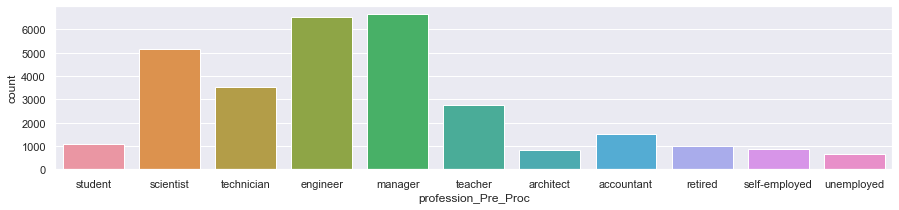

In [58]:
plt.figure(figsize=(15,3))
sns.countplot(x='profession_Pre_Proc',data=df)

## Device
Filling the null values with the majority value (cellular) 

In [59]:
df[df['device'].isnull()] # check how many rows has device null values

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,subscribed,month_l_date,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
491165,married,30,master,engineer,NaN,530,True,True,False,True,...,False,Jun,1,2,2,-1,31,-1,master,engineer
494627,married,40,doctoral,manager,NaN,-922,True,True,True,False,...,False,Jun,1,1,3,-1,227,-1,doctoral,manager
489162,married,39,NaN,engineer,NaN,584,True,True,False,True,...,False,May,1,-1,2,-1,280,-1,doctoral,engineer
490287,married,31,master,engineer,NaN,1390,False,True,False,True,...,False,May,1,2,2,-1,299,-1,master,engineer
491006,married,45,master,teacher,NaN,3284,True,True,False,True,...,False,Jun,1,2,8,-1,23,-1,master,teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484644,married,31,master,technician,NaN,-417,False,True,False,False,...,False,May,1,2,9,-1,119,-1,master,technician
489342,single,32,doctoral,scientist,NaN,93,False,True,False,True,...,False,May,2,1,5,-1,280,-1,doctoral,scientist
489029,single,31,master,teacher,NaN,555,False,True,False,True,...,False,May,2,2,8,-1,280,-1,master,teacher


cellular percentage of all the data is: 65.0%


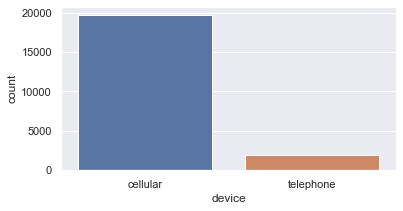

In [60]:
plt.figure(figsize=(6,3))
sns.countplot(x='device',data=df)
print("cellular percentage of all the data is: " + str(np.round((df['device'].value_counts()['cellular']/30517)*100))+"%")

We can see that 65% of all the values in device row is 'cellular'.

So cellular is the majority of the value.

Then we decided that will change the NaN cells to be 'cellular'.

In [61]:
df['device_Pre_Proc'] = df['device'].fillna('cellular')

In [62]:
df['device_Pre_Proc']

id 
512491     cellular
495633     cellular
507946    telephone
491165     cellular
494627     cellular
            ...    
503479     cellular
510801     cellular
495601     cellular
501424     cellular
516748     cellular
Name: device_Pre_Proc, Length: 30517, dtype: object

<AxesSubplot:xlabel='device_Pre_Proc', ylabel='count'>

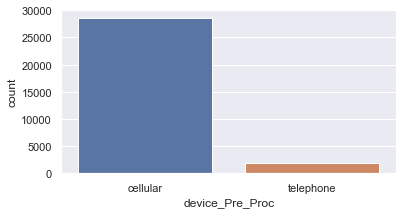

In [63]:
plt.figure(figsize=(6,3))
sns.countplot(x='device_Pre_Proc',data=df)

## P_outcome

In [64]:
df[df['p_outcome'].isnull()]

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,month_l_date,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc,device_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
495633,married,45,master,scientist,cellular,1339,False,True,False,True,...,Jul,1,2,5,0,72,-1,master,scientist,cellular
507946,married,54,master,technician,telephone,2832,False,True,False,True,...,Nov,1,2,9,1,194,-1,master,technician,telephone
491165,married,30,master,engineer,NaN,530,True,True,False,True,...,Jun,1,2,2,-1,31,-1,master,engineer,cellular
494627,married,40,doctoral,manager,NaN,-922,True,True,True,False,...,Jun,1,1,3,-1,227,-1,doctoral,manager,cellular
489162,married,39,NaN,engineer,NaN,584,True,True,False,True,...,May,1,-1,2,-1,280,-1,doctoral,engineer,cellular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522814,married,70,bachelor,accountant,cellular,7013,False,False,False,True,...,Jul,1,0,0,0,22,-1,bachelor,accountant,cellular
503479,married,60,doctoral,manager,cellular,693,False,False,False,True,...,Aug,1,1,3,0,134,-1,doctoral,manager,cellular
510801,single,43,NaN,technician,cellular,437,False,False,False,True,...,Jan,2,-1,9,0,286,-1,bachelor,technician,cellular


In [65]:
#printing correlation to subscribed (target value)
df['p_outcome_cat'].corr(df['subscribed'])

0.25645005153464995

We can see that we have correlation to the target value. (relatively high as other attributes)

Then, althogh alot of data is missing, we don't want to delete this attribule.

In [66]:
#printing correlation to p_days
df['p_outcome_cat'].corr(df['p_days'])

0.7073538563259286

In [67]:
df.groupby(['p_outcome_cat','p_days']).size()

p_outcome_cat  p_days
-1             -1        24940
                98           1
                168          1
                528          1
 0              1            3
                         ...  
 2              550          1
                555          1
                561          1
                651          1
                771          1
Length: 1064, dtype: int64

We can see that almost all the missing values (24940 of 24943) are values that for them p_days == -1.

Then we understand that those cell are people that didn't participate in the previous campain.

Then we will mark this null value as - "missVal"

In [68]:
df['p_outcome_Pre_Proc'] = df['p_outcome']

In [69]:
df['p_outcome_Pre_Proc'] = df['p_outcome'].fillna('missVal')

<AxesSubplot:xlabel='p_outcome_Pre_Proc', ylabel='count'>

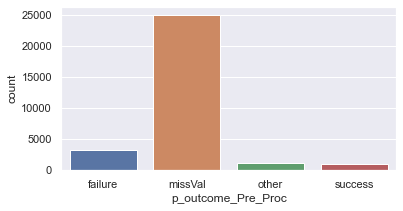

In [70]:
plt.figure(figsize=(6,3))
sns.countplot(x='p_outcome_Pre_Proc',data=df)

## Outliers

#### n_p_contact

In [71]:
df[df['n_p_contact'] > 15]

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc,device_Pre_Proc,p_outcome_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
515711,married,36,bachelor,engineer,cellular,4234,False,True,False,True,...,1,0,2,0,196,1,bachelor,engineer,cellular,other
525706,single,27,doctoral,manager,telephone,6122,False,False,False,True,...,2,1,3,1,219,2,doctoral,manager,telephone,success
512130,married,42,master,student,cellular,226,False,True,False,True,...,1,2,7,0,29,1,master,student,cellular,other
517855,divorced,33,master,scientist,cellular,12,False,True,False,True,...,0,2,5,0,65,0,master,scientist,cellular,failure
514974,married,43,master,technician,telephone,203,False,True,False,True,...,1,2,9,1,165,0,master,technician,telephone,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524164,single,34,doctoral,scientist,cellular,140,True,True,False,True,...,2,1,5,0,141,0,doctoral,scientist,cellular,failure
518432,single,44,master,technician,cellular,897,True,True,False,True,...,2,2,9,0,107,0,master,technician,cellular,failure
511015,single,31,bachelor,engineer,telephone,3129,False,True,False,True,...,2,0,2,1,286,1,bachelor,engineer,telephone,other


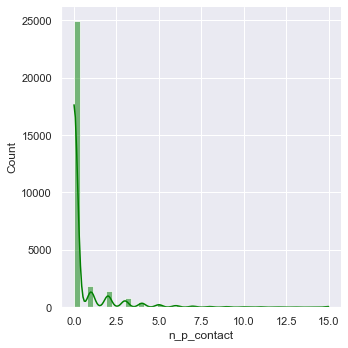

In [72]:
# Only 419 rows has n_p_contact > 15
# Replace this values with 15
df.loc[df['n_p_contact'] > 15,'n_p_contact'] = 15
sns.displot(df['n_p_contact'], bins=40, kde=True, color='green')

#### n_contact

In [73]:
df[df['n_contact'] > 20]

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc,device_Pre_Proc,p_outcome_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
501068,married,44,bachelor,architect,telephone,10,False,False,False,True,...,1,0,1,1,304,-1,bachelor,architect,telephone,missVal
506068,married,52,master,engineer,cellular,285,False,False,False,True,...,1,2,2,0,275,-1,master,engineer,cellular,missVal
500657,married,58,bachelor,engineer,cellular,10,False,True,False,True,...,1,0,2,0,304,-1,bachelor,engineer,cellular,missVal
498917,married,39,master,manager,cellular,10,False,True,False,True,...,1,2,3,0,236,-1,master,manager,cellular,missVal
494289,single,33,master,engineer,NaN,12155,False,True,False,True,...,2,2,2,-1,199,-1,master,engineer,cellular,missVal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500739,divorced,53,doctoral,manager,cellular,2852,False,False,False,True,...,0,1,3,0,304,-1,doctoral,manager,cellular,missVal
500980,married,34,doctoral,manager,cellular,14,False,True,False,True,...,1,1,3,0,304,-1,doctoral,manager,cellular,missVal
490908,single,34,doctoral,manager,NaN,316,False,True,False,True,...,2,1,3,-1,23,-1,doctoral,manager,cellular,missVal


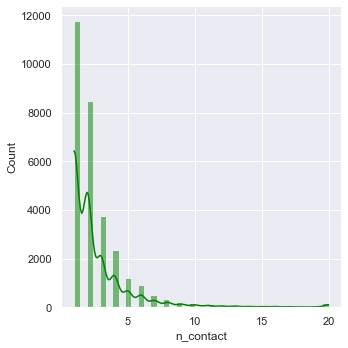

In [74]:
# Only 166 rows has n_contact > 20
# Replace this values with 20
df.loc[df['n_contact'] > 20,'n_contact'] = 20
sns.displot(df['n_contact'], bins=40, kde=True, color='green')

#### p_days

In [75]:
df[df['p_days'] > 400]

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc,device_Pre_Proc,p_outcome_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
527228,married,46,doctoral,manager,cellular,6747,False,False,False,True,...,1,1,3,0,231,0,doctoral,manager,cellular,failure
526657,single,32,master,technician,cellular,421,False,False,False,True,...,2,2,9,0,257,0,master,technician,cellular,failure
527385,married,37,master,manager,cellular,198,False,False,False,True,...,1,2,3,0,141,-1,master,manager,cellular,missVal
526607,married,41,bachelor,engineer,NaN,170,False,True,False,True,...,1,0,2,-1,198,0,bachelor,engineer,cellular,failure
527056,single,43,master,technician,cellular,1546,False,True,False,True,...,2,2,9,0,58,1,master,technician,cellular,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526637,single,30,doctoral,unemployed,cellular,2733,False,False,False,True,...,2,1,10,0,226,0,doctoral,unemployed,cellular,failure
522955,married,34,master,scientist,cellular,553,False,True,False,True,...,1,2,5,0,278,0,master,scientist,cellular,failure
527212,single,45,master,technician,NaN,348,True,False,False,True,...,2,2,9,-1,222,0,master,technician,cellular,failure


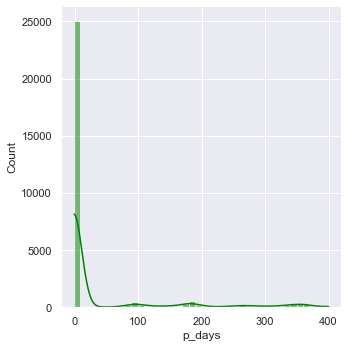

In [76]:
# Only 164 rows has p_days > 400
# Replace this values with 400
df.loc[df['p_days'] > 400,'p_days'] = 400
sns.displot(df['p_days'], bins=40, kde=True, color='green')

#### l_call_duration

In [77]:
df[df['l_call_duration'] > 1500]

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,...,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat,education_Pre_Proc,profession_Pre_Proc,device_Pre_Proc,p_outcome_Pre_Proc
id,,,,,,,,,,,,,,,,,,,,,
510339,married,45,doctoral,engineer,cellular,52,False,True,False,True,...,1,1,2,0,277,-1,doctoral,engineer,cellular,missVal
511060,single,41,master,manager,cellular,2921,False,True,False,True,...,2,2,3,0,295,-1,master,manager,cellular,missVal
485499,single,43,master,scientist,NaN,35,False,True,False,True,...,2,2,5,-1,139,-1,master,scientist,cellular,missVal
501144,married,58,bachelor,self-employed,cellular,1075,False,False,False,True,...,1,0,6,0,304,-1,bachelor,self-employed,cellular,missVal
489856,single,35,master,engineer,NaN,1138,False,False,False,True,...,2,2,2,-1,290,-1,master,engineer,cellular,missVal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512022,married,40,doctoral,manager,telephone,1187,False,False,False,True,...,1,1,3,1,21,-1,doctoral,manager,telephone,missVal
517868,married,34,master,technician,cellular,53,False,True,False,True,...,1,2,9,0,65,1,master,technician,cellular,other
513111,married,53,master,technician,cellular,774,False,True,False,True,...,1,2,9,0,50,-1,master,technician,cellular,missVal


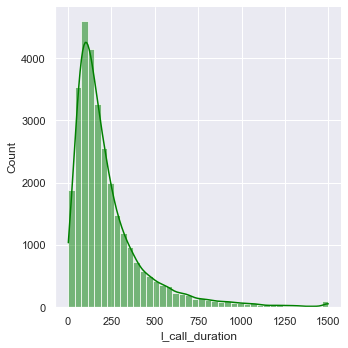

In [78]:
# Only 91 rows has l_call_duration > 1500
# Replace this values with 1500
df.loc[df['l_call_duration'] > 1500,'l_call_duration'] = 1500
sns.displot(df['l_call_duration'], bins=40, kde=True, color='green')

### Deletion of irrelevant features

In [79]:
df.drop('consent', inplace=True, axis=1)
df.drop('campaign_type', inplace=True, axis=1)

# Data reduction

## PCA

In [80]:
df1 = df[['age', 'n_p_contact','p_days','n_contact', 'account_balance', 'l_call_duration', 'status_cat', 'education_cat',
             'profession_cat', 'device_cat', 'month_l_date_cat', 'p_outcome_cat']]
df1.head()

,age,n_p_contact,p_days,n_contact,account_balance,l_call_duration,status_cat,education_cat,profession_cat,device_cat,month_l_date_cat,p_outcome_cat
id,,,,,,,,,,,,
512491,32,1,272,2,300,175,1,1,7,0,29,0
495633,45,0,-1,1,1339,322,1,2,5,0,72,-1
507946,54,0,-1,1,2832,67,1,2,9,1,194,-1
491165,30,0,-1,1,530,45,1,2,2,-1,31,-1
494627,40,0,-1,2,-922,39,1,1,3,-1,227,-1


In [81]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='subscribed')
df2 = pca.transform(df1)
pca.explained_variance_ratio_

array([0.99133991, 0.00644051, 0.00127539])

In [82]:
df_pca = pd.DataFrame(pca.transform(df1))
df_pca.head()

,0,1,2
0,-928.818493,-53.216928,259.982810
1,110.456134,91.328429,-13.639327
2,1602.954729,-168.625127,-50.290632
3,-699.128602,-183.322088,-0.030485
4,-2151.092535,-189.384820,-60.042958


# Data transformation

## Discretization

#### Reduce the profession feature and create a new column isEmployed

In [83]:
df['isEmployed'] = df['profession']

In [84]:
for i, row in df.iterrows():
    if df.loc[i,'isEmployed'] != 'unemployed' and df.loc[i,'isEmployed'] != 'student':
        df.loc[i,'isEmployed'] = 'employed'

<AxesSubplot:xlabel='isEmployed', ylabel='count'>

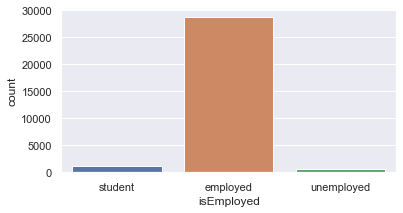

In [85]:
df['isEmployed_cat'] = df['isEmployed'].astype('category').cat.codes
plt.figure(figsize=(6,3))
sns.countplot(x='isEmployed',data=df)

#### Age

In [86]:
df.loc[df['age'] <= 20, 'age_bin'] = 0
df.loc[(df['age'] > 20) & (df['age'] <= 40), 'age_bin'] = 1
df.loc[(df['age'] > 40) & (df['age'] <= 60), 'age_bin'] = 2
df.loc[(df['age'] > 60) & (df['age'] <= 80), 'age_bin'] = 3
df.loc[ df['age'] > 80, 'age_bin'] = 4

<AxesSubplot:xlabel='age_bin', ylabel='count'>

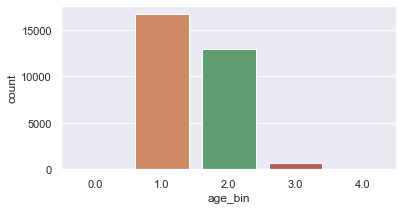

In [87]:
plt.figure(figsize=(6,3))
sns.countplot(x="age_bin",data=df)

#### Account_balance

In [88]:
df.loc[df['account_balance'] <= 0, 'account_balance_bin'] = -1
df.loc[(df['account_balance'] > 0) & (df['account_balance'] <= 1000), 'account_balance_bin'] = 1
df.loc[(df['account_balance'] > 1000) & (df['account_balance'] <= 5000) , 'account_balance_bin'] = 2
df.loc[(df['account_balance'] > 5000) & (df['account_balance'] <= 10000) , 'account_balance_bin'] = 3
df.loc[(df['account_balance'] > 10000) , 'account_balance_bin'] = 4

<AxesSubplot:xlabel='account_balance_bin', ylabel='count'>

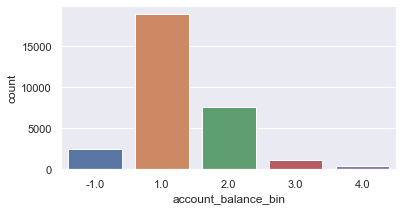

In [89]:
plt.figure(figsize=(6,3))
sns.countplot(x="account_balance_bin",data=df)

### MinMax normalization

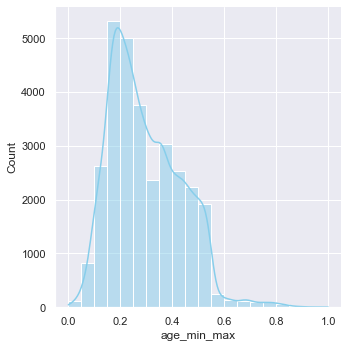

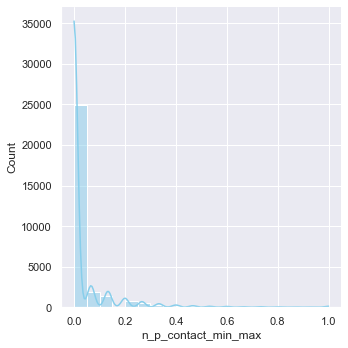

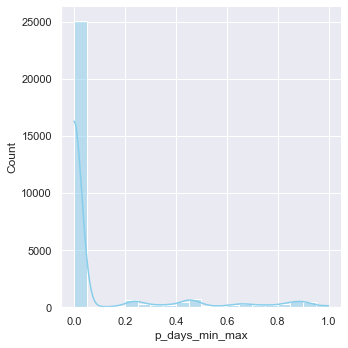

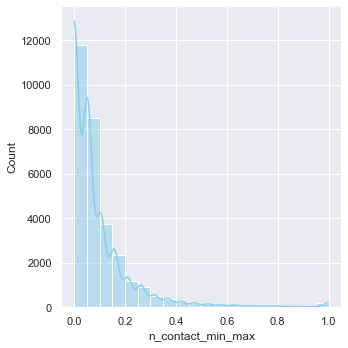

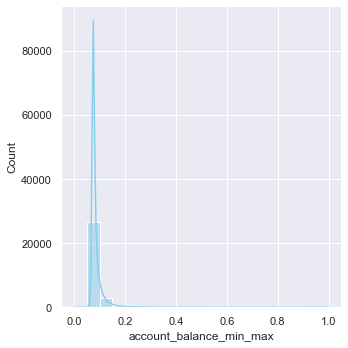

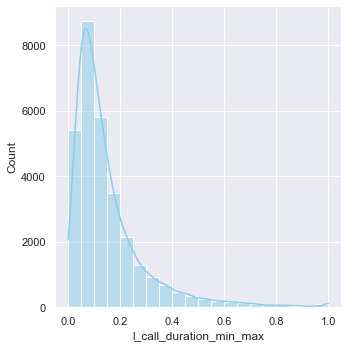

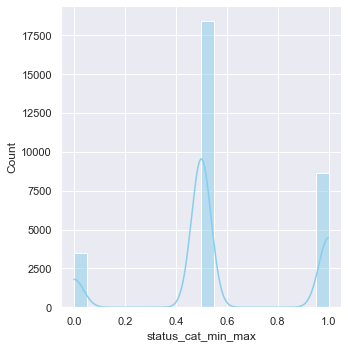

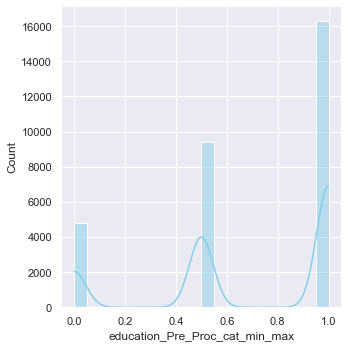

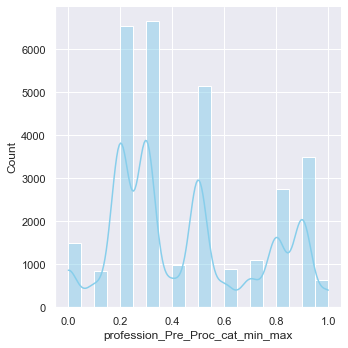

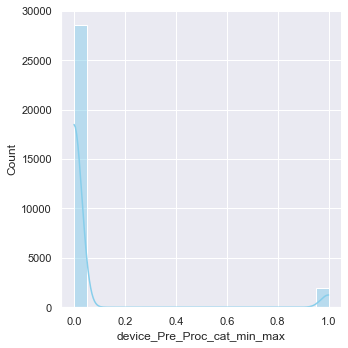

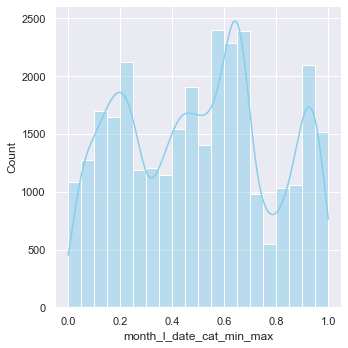

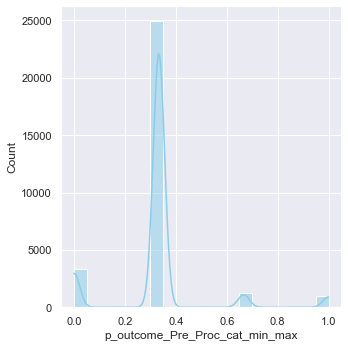

In [90]:
df['education_Pre_Proc_cat'] = df['education_Pre_Proc'].astype('category').cat.codes
df['profession_Pre_Proc_cat'] = df['profession_Pre_Proc'].astype('category').cat.codes
df['device_Pre_Proc_cat'] = df['device_Pre_Proc'].astype('category').cat.codes
df['p_outcome_Pre_Proc_cat'] = df['p_outcome_Pre_Proc'].astype('category').cat.codes

dist_col = ['age', 'n_p_contact','p_days','n_contact', 'account_balance', 'l_call_duration', 'status_cat', 'education_Pre_Proc_cat',
             'profession_Pre_Proc_cat', 'device_Pre_Proc_cat', 'month_l_date_cat', 'p_outcome_Pre_Proc_cat']

for col in dist_col:
    scaler = MinMaxScaler()
    scaler.fit(pd.DataFrame(df[col]))
    df[col+'_min_max'] = scaler.transform(pd.DataFrame(df[col]))
    sns.displot(df[col+'_min_max'], bins=20, kde=True, color='skyblue')


In [91]:
dist_col=['loan','mortgage','credit','positive']
for col in dist_col:
    df[col]=df[col].replace({True: 1,False: 0})

In [92]:
num_col_export = df.describe().columns # to get the numeric column

In [93]:
num_data_export = df[num_col_export] # numeric data

In [94]:
df['subscribed'] = df['subscribed'].replace({True: 1,False: 0})

In [95]:
num_data_export['subscribed'] = df['subscribed']

<ipython-input-95-f62a4cf2c92f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data_export['subscribed'] = df['subscribed']


In [96]:
num_data_export.to_excel("marketing_campaigns_train_after_pre_proc.xlsx", sheet_name='sheet1')  